In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
df = pd.read_csv("file:///Users/kaan/Desktop/Berlin_crimes.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            1200 non-null   int64 
 1   District        1200 non-null   object
 2   Code            1200 non-null   int64 
 3   Location        1200 non-null   object
 4   Robbery         1200 non-null   int64 
 5   Street_robbery  1200 non-null   int64 
 6   Injury          1200 non-null   int64 
 7   Agg_assault     1200 non-null   int64 
 8   Threat          1200 non-null   int64 
 9   Theft           1200 non-null   int64 
 10  Car             1200 non-null   int64 
 11  From_car        1200 non-null   int64 
 12  Bike            1200 non-null   int64 
 13  Burglary        1200 non-null   int64 
 14  Fire            1200 non-null   int64 
 15  Arson           1200 non-null   int64 
 16  Damage          1200 non-null   int64 
 17  Graffiti        1200 non-null   int64 
 18  Drugs   

In [14]:
df['City_population'] = np.nan
df.loc[df['Year'] == 2012, 'City_population'] = 3476000
df.loc[df['Year'] == 2013, 'City_population'] = 3488000
df.loc[df['Year'] == 2014, 'City_population'] = 3501000
df.loc[df['Year'] == 2015, 'City_population'] = 3514000
df.loc[df['Year'] == 2016, 'City_population'] = 3526000
df.loc[df['Year'] == 2017, 'City_population'] = 3539000
df.loc[df['Year'] == 2018, 'City_population'] = 3552000
df.loc[df['Year'] == 2019, 'City_population'] = 3557000
df['City_population'] = df['City_population'].astype(int)
df

robbery_counts_per_year = df[df['District'] == 'Mitte'].groupby('Year')['Robbery'].sum()

print(robbery_counts_per_year)



Year
2012    1253
2013    1096
2014    1014
2015    1040
2016     976
2017     763
2018     733
2019     707
Name: Robbery, dtype: int64


In [33]:
district_names = df["District"].unique()
print(district_names)


['Mitte' 'Friedrichshain-Kreuzberg' 'Pankow' 'Charlottenburg-Wilmersdorf'
 'Spandau' 'Steglitz-Zehlendorf' 'Tempelhof-Schöneberg' 'Neukölln'
 'Treptow-Köpenick' 'Marzahn-Hellersdorf' 'Lichtenberg' 'Reinickendorf']


In [17]:
robbery_counts_mitte = df[df["District"] == "Mitte"].groupby(["Year"])["Robbery"].sum()

robbery_counts_mitte

Year
2012    1253
2013    1096
2014    1014
2015    1040
2016     976
2017     763
2018     733
2019     707
Name: Robbery, dtype: int64

In [19]:
robbery_counts_total = df.groupby(["Year", "District"])["Robbery"].sum()
robbery_counts_total

Year  District                  
2012  Charlottenburg-Wilmersdorf     643
      Friedrichshain-Kreuzberg       868
      Lichtenberg                    260
      Marzahn-Hellersdorf            331
      Mitte                         1253
                                    ... 
2019  Reinickendorf                  236
      Spandau                        211
      Steglitz-Zehlendorf            217
      Tempelhof-Schöneberg           352
      Treptow-Köpenick               169
Name: Robbery, Length: 96, dtype: int64

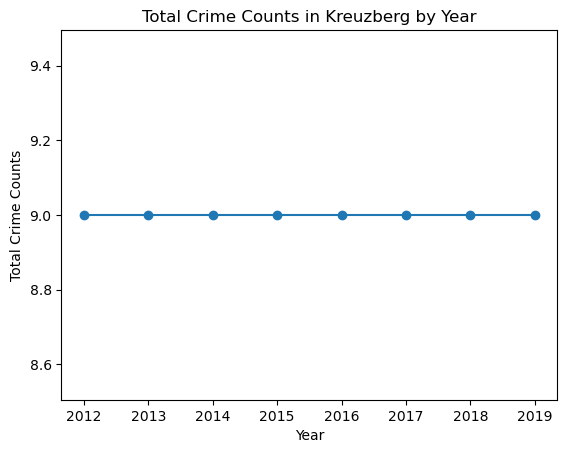

In [34]:
import matplotlib.pyplot as plt

# Filter the data for Kreuzberg district
kreuzberg_data = df[df["District"] == "Friedrichshain-Kreuzberg"]

# Group the data by year and calculate the total crime counts
crime_counts_by_year = kreuzberg_data.groupby("Year").size()

if not crime_counts_by_year.empty:
    # Plotting the data
    plt.plot(crime_counts_by_year.index, crime_counts_by_year.values, marker="o")
    plt.xlabel("Year")
    plt.ylabel("Total Crime Counts")
    plt.title("Total Crime Counts in Kreuzberg by Year")
    plt.show()
else:
    print("No data available for plotting.")


In [11]:
df["Crime_Category"] = df["Crime_Type"].apply(lambda x: "Drug-related" if "drugs" in x.lower() else "Other")


KeyError: 'Crime_Type'